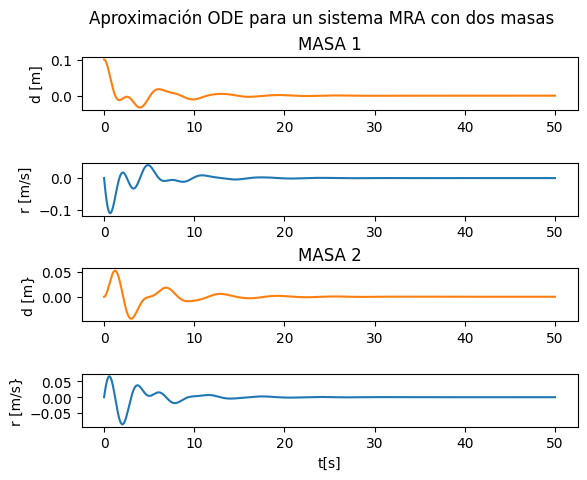

In [ ]:
# Importamos las librerias que vamos a utilizar
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definimos el tiempo máximo, el valor del intervalo, la cantidad de pasos
# y el vector de tiempo
tmax = 50
dt = 0.01
n = (tmax / dt)
t = np.linspace(0, tmax, int(n) + 1)

# Seteamos los valores de las constantes
M = [1, 1]
K = [1, 2, 1]
C = [0.5, 0.2, 0.2]

# Condiciones iniciales siendo y1, y1', y2 e y2'
X0 = [0.1, 0, 0, 0]

# Definimos la función que vamos a meter luego dentro de la función odeint,
# según las ecuaciones calculadas previamente.
def fun(X0, t):
    x1 = X0[0]
    x1p = X0[1]
    x2 = X0[2]
    x2p = X0[3]
    k1 = K[0]
    k12 = K[1]
    k2 = K[2]
    c1 = C[0]
    c12 = C[1]
    c2 = C[2]
    f1 = k1 * x1 + c1 * x1p
    f2 = k12 * (x1 - x2) + c12 * (x1p - x2p)
    f3 = -f2
    f4 = k2 * x2 + c2 * x2p
    x1pp = (1 / M[0]) * (-f1 - f2)
    x2pp = (1 / M[1]) * (-f3 - f4)
    return [x1p, x1pp, x2p, x2pp]

# Definimos la función que resuelve la ODE
sol = odeint(fun, X0, t)

# Graficamos
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig1.suptitle('Aproximación ODE para un sistema MRA con dos masas')
ax1.plot(t, sol[:, 0], 'tab:orange')
ax1.set_title('MASA 1')
ax1.set(ylabel='d [m]')
ax2.plot(t, sol[:, 1], 'tab:blue')
ax2.set(ylabel='r [m/s]')
ax3.set_title('MASA 2')
ax3.plot(t, sol[:, 2], 'tab:orange')
ax3.set(ylabel='d [m}')
ax4.plot(t, sol[:, 3], 'tab:blue')
ax4.set(xlabel='t[s]', ylabel='r [m/s}')
plt.subplots_adjust(hspace=1)